### limit_p_plot.ipynb
This is a juypter notebook-ised version of a plotting function coded by the original authors of this repo
- Plots 2 lines (distance between $P_x$ and $P_1, P_{10}$)
    - Uses a limits.csv file that can be generated by running solve.py with limits flag -t

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import seaborn as sns
import os

In [11]:
def plot_data(data: pd.DataFrame, title: str):
    """
    This function plots the limit P data (-t True).
    INPUT: data -- pd.DataFrame, title -- str (title of the plot)
    """
    plt.figure(figsize=(6, 3))
    # Set the style of the plots
    plt.style.use("ggplot")
    plt.grid(True)

    plt.plot(data["p"], data["Dist_p"], label="$||P^{(1)}_S-P^{(P)}_S||_p$")
    plt.plot(data["p"], data["Dist_inf"], label="$||P^{(\infty)}_S-P^{(P)}_S||_p$")

    plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], 
        where=data["Dist_p"] <= data["Dist_inf"], 
        color="green", alpha=0.3, label="Utilitarian Zone")

        # Combined fill for Egalitarian and Fully Egalitarian Zones
    plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], 
                     where=(data["Dist_p"] >= data["Dist_inf"]), 
                     color="blue", alpha=0.3, label="Egalitarian Zone")

    
    # Mark the transition point
    #transition_point = data.loc[data["Dist_p"] >= data["Dist_inf"], ["p", "Dist_p"]].iloc[0]
    #plt.scatter(transition_point["p"], transition_point["Dist_p"], color="red", label="Transition Point")

    #HCVA_point = 1.1

    plt.xlabel("p")
    plt.ylabel("Distance")
    plt.legend()
    plt.show()

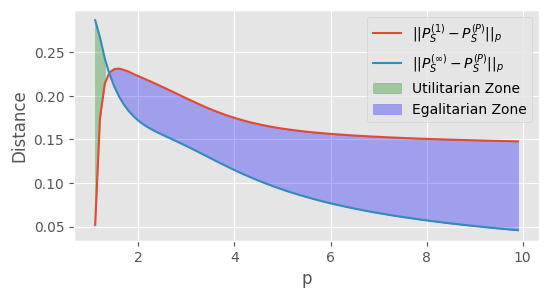

In [14]:
data = pd.read_csv("/home/ia23938/Documents/GitHub/ValueSystemsAggregation/limits.csv")
plot_data(data, "Value Principle Preference Matrix Aggregation (limit P)")
